This script visualizes the results of a grid search over Berp parameters.

In [28]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results_dir = Path("../results/gillis2021/models_berp_grid/berp-fixed/")

In [4]:
trials_df = pd.read_csv(results_dir / "trials.csv")
trials_df

,number,value,datetime_start,datetime_complete,duration,params_encoder__alpha,params_encoder__init_scale,params_encoder__optim__learning_rate,params_threshold,user_attrs_mean_fit_time,user_attrs_mean_score_time,user_attrs_mean_test_score,user_attrs_split0_test_score,user_attrs_split1_test_score,user_attrs_split2_test_score,user_attrs_split3_test_score,user_attrs_std_fit_time,user_attrs_std_score_time,user_attrs_std_test_score,state
0,0,0.001142,2022-09-15 18:23:30.910525,2022-09-15 18:23:39.192210,0 days 00:00:08.281685,1.535498e+09,0.000304,0.013576,0.909377,1.651053,0.361934,0.001142,0.008981,0.000404,-0.000340,-0.004476,0.741360,0.109134,0.004893,COMPLETE
1,1,0.001509,2022-09-15 18:23:39.194186,2022-09-15 18:23:55.045756,0 days 00:00:15.851570,8.809993e+08,0.003856,0.191953,0.719454,3.094333,0.650016,0.001509,0.003683,0.002823,-0.006709,0.006240,0.287595,0.275957,0.004908,COMPLETE
2,2,0.002750,2022-09-15 18:23:55.047349,2022-09-15 18:24:01.750612,0 days 00:00:06.703263,5.285331e+08,0.001212,0.005960,0.326148,1.227464,0.311222,0.002750,-0.000838,0.004872,0.002550,0.004415,0.136269,0.156296,0.002247,COMPLETE
3,3,0.001575,2022-09-15 18:24:01.752388,2022-09-15 18:24:09.521660,0 days 00:00:07.769272,2.132210e+08,0.000038,0.003211,0.394808,1.494896,0.301018,0.001575,0.002601,-0.004390,0.005118,0.002972,0.364623,0.138882,0.003576,COMPLETE
4,4,0.003255,2022-09-15 18:24:09.523416,2022-09-15 18:24:23.510667,0 days 00:00:13.987251,2.008241e+06,0.000114,0.031707,0.235640,2.996901,0.354725,0.003255,0.008718,0.001781,0.000245,0.002274,0.498322,0.093281,0.003242,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.005078,2022-09-15 18:36:16.586087,2022-09-15 18:36:23.325028,0 days 00:00:06.738941,2.485405e+05,0.000041,0.005685,0.944806,1.263537,0.364738,-0.005078,-0.002533,-0.005163,-0.010884,-0.001734,0.167671,0.205489,0.003584,PRUNED
96,96,-0.000723,2022-09-15 18:36:23.326351,2022-09-15 18:36:29.574206,0 days 00:00:06.247855,2.446026e+04,0.000100,0.001149,0.994889,1.216791,0.288476,-0.000723,-0.001520,-0.000069,-0.001103,-0.000200,0.302521,0.078097,0.000609,COMPLETE
97,97,0.000863,2022-09-15 18:36:29.575926,2022-09-15 18:36:41.345884,0 days 00:00:11.769958,1.280134e+03,0.000020,0.012605,0.328698,2.207940,0.617007,0.000863,-0.001915,-0.001685,0.006702,0.000351,0.298854,0.260181,0.003484,COMPLETE
98,98,0.001397,2022-09-15 18:36:41.347453,2022-09-15 18:36:47.482277,0 days 00:00:06.134824,2.734478e+04,0.001175,0.000449,0.946769,1.105312,0.370741,0.001397,0.000301,0.001289,0.000410,0.003588,0.052484,0.150409,0.001322,COMPLETE


In [15]:
param_cols = [c for c in trials_df.columns if c.startswith("params_")]
melted_df = trials_df[["value"] + param_cols].melt(id_vars="value", value_name="param_val")

In [25]:
log_param_cols = [f"params_{x}" for x in ["encoder__alpha", "encoder__init_scale", "encoder__optim__learning_rate"]]
melted_log_df = melted_df[melted_df.variable.isin(log_param_cols)]
melted_norm_df = melted_df[~melted_df.variable.isin(log_param_cols)]

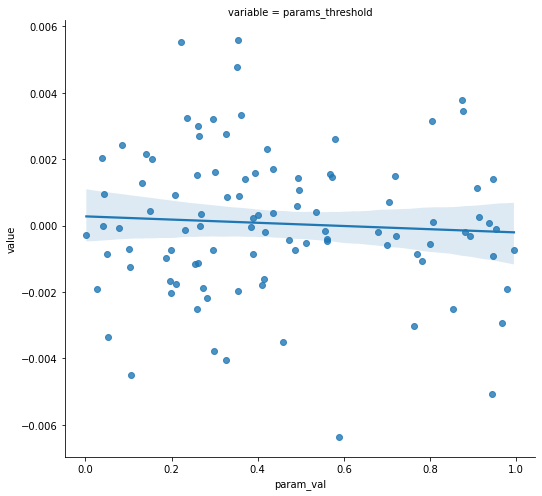

In [26]:
g = sns.FacetGrid(data=melted_norm_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "param_val", "value")

/tmp/ipykernel_111927/3795883258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)


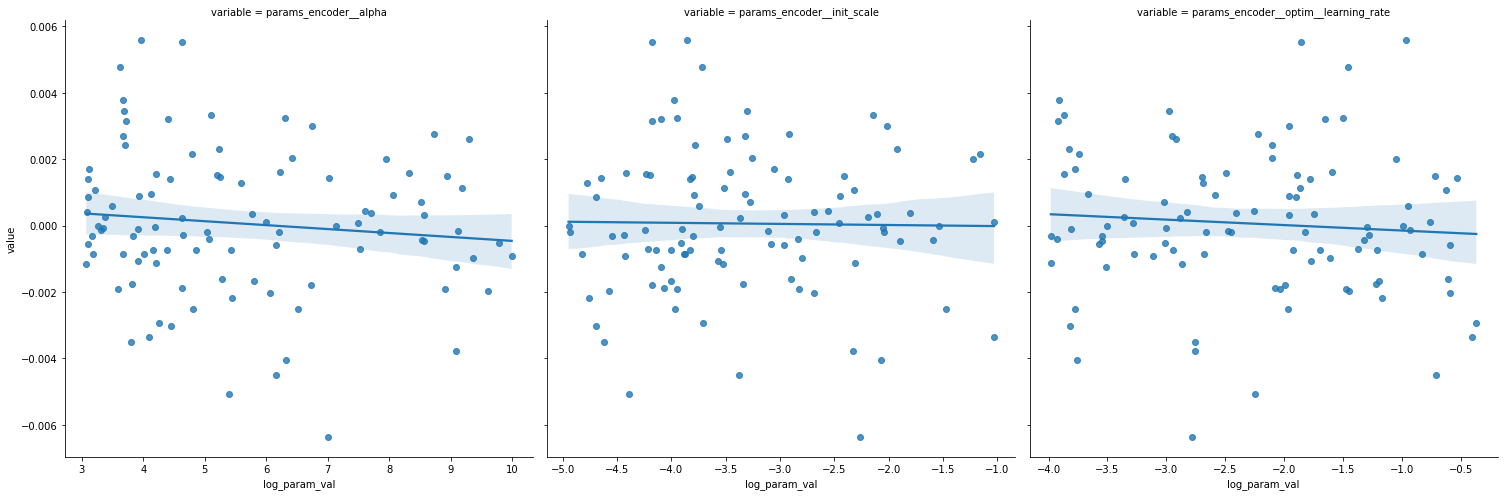

In [29]:
melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)
g = sns.FacetGrid(data=melted_log_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "log_param_val", "value")